In [41]:
import pandas as pd


In [ ]:
import glob
path=r"C:\Users\riche\OneDrive\Desktop\stem-fellowship-osteoporosis\final-data"
filenames=glob.glob(path+"/*.csv")
dfs=[]
for filename in filenames:
    dfs.append(pd.read_csv(filename))

df=pd.concat(dfs,ignore_index=True)

In [43]:
df.shape

(488, 55)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      483 non-null    object 
 1   hipFracture                 488 non-null    object 
 2   spineFracture               488 non-null    object 
 3   otherAdultFracture          487 non-null    object 
 4   fractureAge                 291 non-null    float64
 5   fracturedBones              313 non-null    object 
 6   priorDexaScan               488 non-null    object 
 7   lastDexaScanDetails         336 non-null    object 
 8   fragilityFractureAfter45    488 non-null    object 
 9   youngLowTraumaFracture      487 non-null    object 
 10  menopauseStatus             226 non-null    object 
 11  currentlyInMenopause        225 non-null    object 
 12  menopauseType               225 non-null    object 
 13  ovariesRemoved              217 non

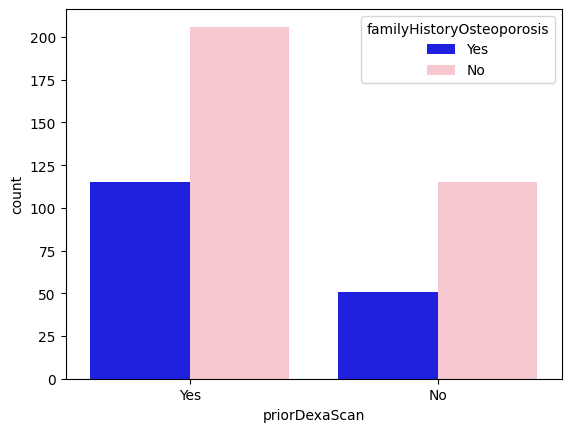

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df,x=df["priorDexaScan"],hue=df["familyHistoryOsteoporosis"],palette=["blue","pink"])
plt.show()

In [47]:
# Get ratio instead of raw numbers using normalize=True
expected_ratio = df['priorDexaScan'].value_counts(normalize=True)


# Round and then convert to percentage
expected_ratio = expected_ratio.round(4)*100



df_ratios = pd.DataFrame({'Expected':expected_ratio})
df_ratios

,Expected
priorDexaScan,
Yes,65.98
No,34.02


In [48]:
# Define the upsampling factor (e.g., double the size)
upsample_factor = 10

# Stratified upsampling
stratified_upsample = df.groupby("priorDexaScan", group_keys=False).apply(
    lambda x: x.sample(n=len(x) * upsample_factor, replace=True, random_state=42)
)


C:\Users\riche\AppData\Local\Temp\ipykernel_9908\80151105.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_upsample = df.groupby("priorDexaScan", group_keys=False).apply(


In [49]:
stratified_upsample.shape

(4880, 55)

<Axes: xlabel='priorDexaScan', ylabel='count'>

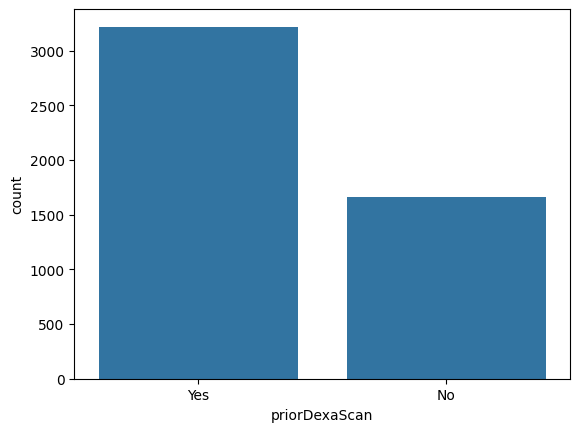

In [57]:
class_count=stratified_upsample["priorDexaScan"].value_counts()
sns.barplot(class_count)